In [1]:
from data.dataset import Dataset, DatasetNames

dataset = Dataset()

dataset_name = DatasetNames.ARITHMETIC

dataset_path = dataset.generate(dataset_name)

train_data, val_data, vocabulary_size = dataset.get(dataset_name)

In [2]:
import torch
from models.gpt.gpt_model import GPT
from training.train_model import train_model

n_embeddings = 32
n_heads = 4
n_layers = 3
max_iterations = 5000
iterations_interval = 100
eval_iterations = 200
batch_size = 32
learning_rate = 1e-3
context_length = 8
dropout = 0.2

device = "cuda" if torch.cuda.is_available() else "cpu"

gpt_model = GPT(vocabulary_size, n_embeddings, n_heads, context_length, n_layers, dropout).to(device)

train_losses, val_losses, steps = train_model(gpt_model, max_iterations, iterations_interval, eval_iterations, batch_size, learning_rate, context_length, train_data, val_data, device)

step 0: train loss 2.8347, val loss 2.8358
step 100: train loss 2.2057, val loss 2.2028
step 200: train loss 2.0179, val loss 2.0144
step 300: train loss 1.9668, val loss 1.9571
step 400: train loss 1.9381, val loss 1.9351
step 500: train loss 1.9204, val loss 1.9229
step 600: train loss 1.9180, val loss 1.9203
step 700: train loss 1.9146, val loss 1.9062
step 800: train loss 1.8966, val loss 1.8909
step 900: train loss 1.8959, val loss 1.8915
step 1000: train loss 1.9005, val loss 1.8962
step 1100: train loss 1.8932, val loss 1.8968
step 1200: train loss 1.8781, val loss 1.8793
step 1300: train loss 1.8779, val loss 1.8803
step 1400: train loss 1.8865, val loss 1.8867
step 1500: train loss 1.8831, val loss 1.8716
step 1600: train loss 1.8801, val loss 1.8805
step 1700: train loss 1.8814, val loss 1.8809
step 1800: train loss 1.8732, val loss 1.8705
step 1900: train loss 1.8775, val loss 1.8775
step 2000: train loss 1.8782, val loss 1.8830
step 2100: train loss 1.8652, val loss 1.8695


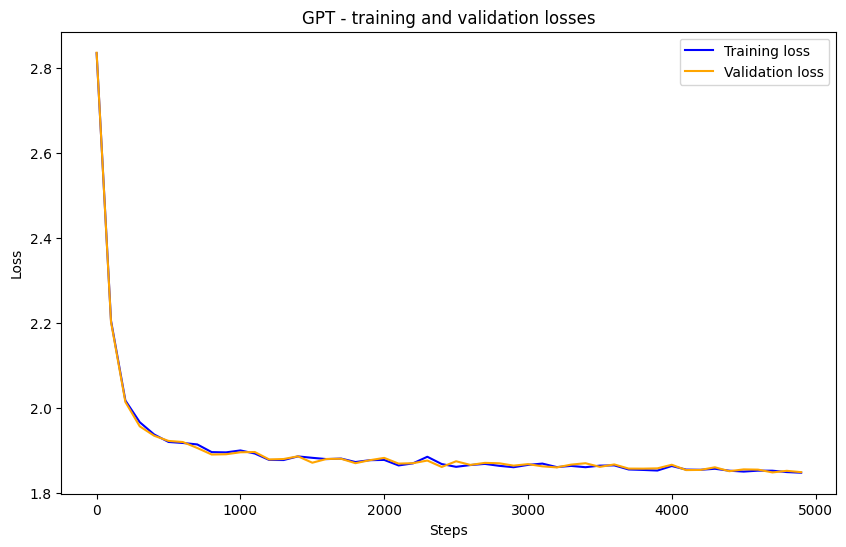

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(steps, train_losses, label='Training loss', color='blue')
plt.plot(steps, val_losses, label='Validation loss', color='orange')
plt.title('GPT - training and validation losses')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
from data.tokenizer import decode, get_decoding, get_vocabulary

idx = torch.zeros((1, 1), dtype=torch.long, device=device)

generated = gpt_model.generate(idx, max_new_tokens=1000)[0].tolist()

p = dataset.paths[DatasetNames.ARITHMETIC]

with open(p) as file:
    text = file.read()

decoding = get_decoding(get_vocabulary(text))
print(decode(generated, decoding)) # ~ random generation, model not trained


4=1519=5
3*2=200+3=32=10
622
10=2=12=41832-2+4=5019=401
70
9
62-2*454*30-9=2754+4
12=18
5-8
4+16=7.0
523
4/61=36-52/4.0
9=-6
7480
4
40
331*752=410
40=7
351180/470
1
10=-5262-1=2=-3*17
1.0
1/9177
4
7
5*5*67=1
11.0*6+1=6=-620
286
3467
2=16=1=56=1488
3=6=4=-50+7.0
40
8=1
1=19-9=96=21=2=82
1=7
1
788
7=17=68.0
70
6/8.0=88=70
5+9*2.0=45=7-87
6*24.0
7+10
5=99=-3/112
66*5560
8
982310
2=1.0
9+3499/6/1914=8*3752
5-1=-147=99
230
8
9=6
640-7-28=8*7
30
25
5.04317
1
916
2*213+5.0-7.0
939*50
41+4
93*1*30+3784=-40
44-17
1.0
3
15648+15+19.0+15=1135/1
46.0
77=3=-5*20
62
48
210
39=46-64
626*92=3
65*94=130=6/6=1*4.0.0=1
18.0
17
4
74
80
4=616
78*7+639/8-420=7=-10*11*7+12.06*126.0
7-31
7=-10=-900
349=60=-6.0
7965=20
254=5=5*380*3*9
27
7
9
46194+5+12=242=128=1-10
75=-5/55083618=98967/2*12=40
1323331=-9+3
10
2027
223
3*4=14.00=1+3=5=10=1583=4.0
6.0
10+6/122960
1338=1.0
12340/35
7*8
1*20-5/5
10
8
1+6=-7=-48=90-1/60
2=-114=-5=-116=87255*29
4-633
2=840
7
697*9=30
39-9
5-59+8
60-1=11344
376548=7+11
111=15-2=9
8*